In [8]:
import os 
import sys

%matplotlib inline
import matplotlib.pyplot as plt

from desilike.samples import Profiles, Chain, plotting

plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [2]:
tracer = 'ELG_LOPnotqso'
region = 'GCcomb'
zrange = (1.1, 1.6)
version = 'v4_1fixran'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}'.format(version)

template_name = 'shapefitqisoqap'

chains_dir = os.path.join(data_dir, 'chains', 'chains_{}_{{}}_z{:.3f}-z{:.3f}_{{}}_{}'.format(template_name, zrange[0], zrange[1], region), 'physicalpriorbasis')

chain_complete = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_ezmockscov_withshotnoise_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_complete_thetacut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_ezmockscov_thetacut0.05_withshotnoise_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_altmtl = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'power_velocileptors_ezmockscov_withshotnoise_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_altmtl_thetacut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'power_velocileptors_ezmockscov_thetacut0.05_withshotnoise_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

In [3]:
print(chains_dir.format(tracer[:7], 'complete'))

/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v4_1fixran/chains/chains_shapefitqisoqap_ELG_LOP_z1.100-z1.600_complete_GCcomb/physicalpriorbasis


In [4]:
from getdist import plots
g = plots.get_single_plotter(width_inch=6, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12
g.settings.alpha_factor_contour_lines = 0

In [5]:
for iparam, param in enumerate(['qiso', 'qap', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'b3p', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p']):
    print(param)
    print(chain_altmtl_thetacut[param].param.prior)

qiso
uniform[0.8, 1.2]({})
qap
uniform[0.8, 1.2]({})
dm
uniform[-3.0, 3.0]({})
df
uniform[0.0, 2.0]({})
b1p
uniform[0.0, 3.0]({})
b2p
norm({'loc': 0.0, 'scale': 5.0})
bsp
norm({'loc': 0.0, 'scale': 5.0})
b3p
norm({'loc': 0.0, 'scale': 5.0})
alpha0p
norm({'loc': 0.0, 'scale': 10.0})
alpha2p
norm({'loc': 0.0, 'scale': 10.0})
alpha4p
norm({'loc': 0.0, 'scale': 10.0})
sn0p
norm({'loc': 0.0, 'scale': 10.0})
sn2p
norm({'loc': 0.0, 'scale': 10.0})
sn4p
norm({'loc': 0.0, 'scale': 10.0})


In [6]:
chain_complete[0].params

<bound method BaseParameterCollection.params of Chain(shape=(1, 40), params=ParameterCollection(['qiso', 'qap', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'logposterior', 'dn', 'b3p', 'f_sqrt_Ap', 'm', 'n', 'loglikelihood', 'logprior', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p']))>

Removed no burn in
Removed no burn in
Removed no burn in


/tmp/ipykernel_212298/1283978082.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(plots_dir, version, 'corner_plot_power_{}_{}_complete_altmtl_thetacut0.05.png'.format(tracer, region)), dpi=300)


<Figure size 600x600 with 0 Axes>

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


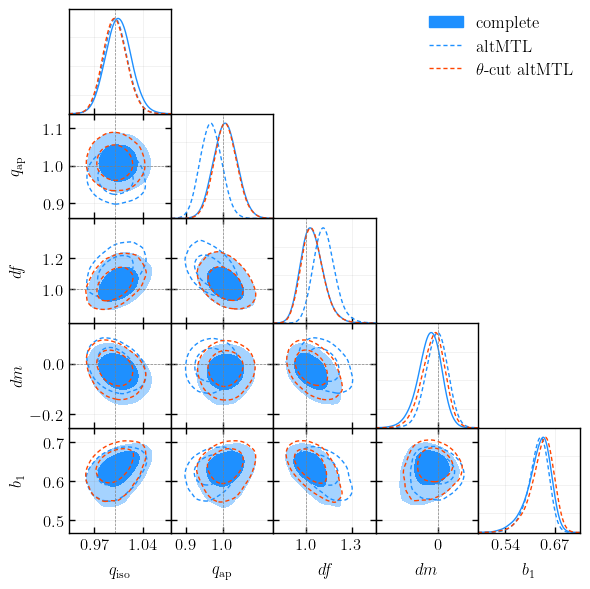

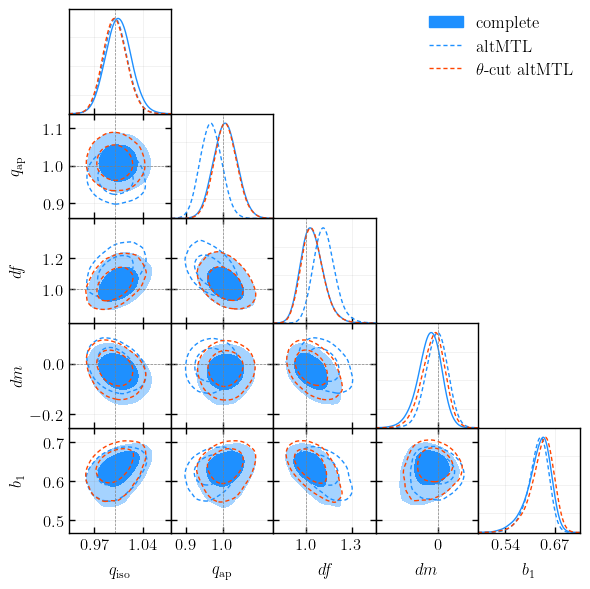

In [9]:
markers = {'qiso': 1., 'qap': 1., 'df': 1., 'dm': 0.}
params = ['qiso', 'qap', 'df', 'dm', 'b1p']
colors = ['dodgerblue', 'dodgerblue', 'orangered']
plotting.plot_triangle([chain_complete, chain_altmtl, chain_altmtl_thetacut], labels=[r'complete', r'altMTL', r'$\theta$-cut altMTL'], 
                       markers=markers, params=params,
                       g=g, lws=1., contour_lws=1., filled=[True, False, False], contour_ls=['-', '--', '--'], colors=colors, contour_colors=colors,
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, version, 'corner_plot_power_{}_{}_complete_altmtl_thetacut0.05.png'.format(tracer, region)), dpi=300)
plt.show()

Removed no burn in
Removed no burn in


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


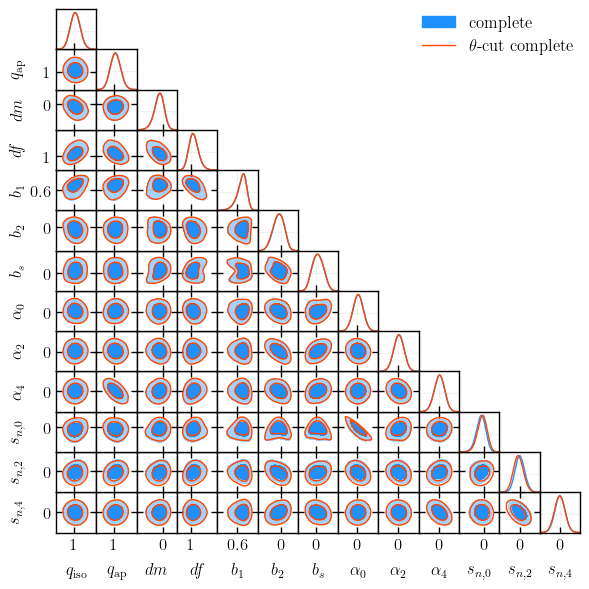

In [10]:
plotting.plot_triangle([chain_complete, chain_complete_thetacut], labels=[r'complete', r'$\theta$-cut complete'], 
                       #markers=markers, params=params,
                       g=g, lws=1., contour_lws=1., filled=[True, False], contour_ls=['-', '-'], colors=['dodgerblue', 'orangered'], contour_colors=['dodgerblue', 'orangered'],
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
#plt.savefig(os.path.join(plots_dir, version, 'corner_plot_power_{}_{}_complete_thetacut0.05.png'.format(tracer, region)), dpi=300)
plt.show()

In [11]:
params = ['qiso', 'qap', 'dm', 'df', 'b1p']

for iparam, param in enumerate(params):
    print(param)
    desi_y1_err = chain_altmtl_thetacut.std(param)
    print('Y1 error: ', desi_y1_err)
    bestfitdiff_thetacut = chain_complete_thetacut.mean(param) - chain_complete.mean(param)
    bestfitdiff_altmtl = chain_altmtl.mean(param) - chain_complete.mean(param)
    bestfitdiff_altmtl_thetacut = chain_altmtl_thetacut.mean(param) - chain_complete.mean(param)
    print('theta-cut - complete:', bestfitdiff_thetacut, '({:.3f}% of DR1 error)'.format(bestfitdiff_thetacut/desi_y1_err*100))
    print('altmtl - complete:', bestfitdiff_altmtl, '({:.3f}% of DR1 error)'.format(bestfitdiff_altmtl/desi_y1_err*100))
    print('altmtl theta-cut - complete:', bestfitdiff_altmtl_thetacut, '({:.3f}% of DR1 error)'.format(bestfitdiff_altmtl_thetacut/desi_y1_err*100))

qiso
Y1 error:  0.017055119897485906
theta-cut - complete: 0.00019616229090280157 (1.150% of DR1 error)
altmtl - complete: -0.004161502225052516 (-24.400% of DR1 error)
altmtl theta-cut - complete: -0.0051841470627016495 (-30.396% of DR1 error)
qap
Y1 error:  0.031190721145303357
theta-cut - complete: -5.188342851192296e-05 (-0.166% of DR1 error)
altmtl - complete: -0.039124763342243685 (-125.437% of DR1 error)
altmtl theta-cut - complete: 0.0006499690134200709 (2.084% of DR1 error)
dm
Y1 error:  0.0479267450757663
theta-cut - complete: 0.0017629410968980977 (3.678% of DR1 error)
altmtl - complete: 0.029319265797164283 (61.175% of DR1 error)
altmtl theta-cut - complete: 0.014937976973555148 (31.168% of DR1 error)
df
Y1 error:  0.07471433076239598
theta-cut - complete: 0.0019176736222119573 (2.567% of DR1 error)
altmtl - complete: 0.07990495298431655 (106.947% of DR1 error)
altmtl theta-cut - complete: 0.002226577365353588 (2.980% of DR1 error)
b1p
Y1 error:  0.031907283100042795
theta-